In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime

In [2]:
directory = "/Users/ningyuhan/Desktop/Transcripts_excel/"

# List all the Excel files in the directory
excel_files = [f for f in os.listdir(directory) if f.endswith('.xlsx')]

dfs = []

for file in excel_files:
    file_path = os.path.join(directory, file)
    df = pd.read_excel(file_path)
    
    # Extract file name without extension
    base_name = os.path.splitext(file)[0]
    
    # Construct the variable name
    var_name = f'df_{base_name}'

    dfs.append(var_name)
    
    # Assign the DataFrame to the variable with the constructed name
    globals()[var_name] = df

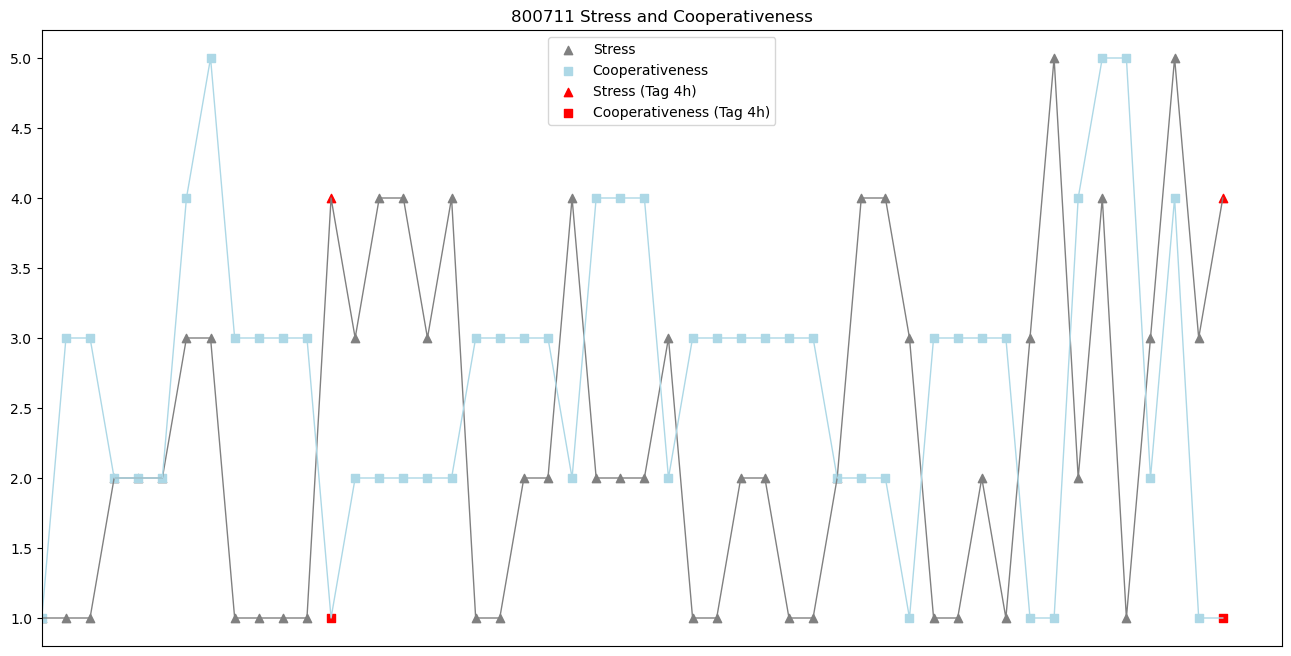

In [3]:
def extract_third_component(tag_str):
    components = tag_str.strip('[]').split(',')
    if len(components) >= 3:
        return components[2]
    return None

df_800711['third_component'] = df_800711['Tag'].apply(extract_third_component)


# Plot
plt.figure(figsize=(16, 8)) 

special_index = df_800711[df_800711['third_component'] == '4h'].index
regular_index = df_800711[df_800711['third_component'] != '4h'].index

# To make the plot starts from 1
x_values = df_800711.index + 1

# Plot 4h
plt.scatter(x_values[regular_index], df_800711.loc[regular_index, 'stress_claude2'], 
            color='gray', marker='^', label='Stress')
plt.scatter(x_values[regular_index], df_800711.loc[regular_index, 'cooperativeness_calude2'], 
            color='lightblue', marker='s', label='Cooperativeness')

# Plot other scatters
plt.scatter(x_values[special_index], df_800711.loc[special_index, 'stress_claude2'], 
            color='red', marker='^', label='Stress (Tag 4h)')
plt.scatter(x_values[special_index], df_800711.loc[special_index, 'cooperativeness_calude2'], 
            color='red', marker='s', label='Cooperativeness (Tag 4h)')

plt.plot(x_values, df_800711['stress_claude2'], color='gray', linestyle='-', linewidth=1)
plt.plot(x_values, df_800711['cooperativeness_calude2'], color='lightblue', linestyle='-', linewidth=1)

plt.xlim(left=1)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.title('800711 Stress and Cooperativeness')
plt.legend()
plt.show()

In [4]:
def convert_to_datetime(name):
    # Extract the date part and convert it to datetime
    date_str = name.split('_')[1]  # Get the 'YYMMDD' part
    year = int('19' + date_str[:2])  # Assuming all dates are in the 1900s
    month = int(date_str[2:4])
    day = int(date_str[4:6])
    return datetime(year, month, day)


dfs_sorted = sorted(dfs, key=lambda name: convert_to_datetime(name))
print(dfs_sorted)

['df_800711', 'df_800909', 'df_801028', 'df_801112', 'df_810121', 'df_810302', 'df_810408', 'df_810527', 'df_810618', 'df_810722', 'df_810902', 'df_811021', 'df_811216', 'df_820218', 'df_820324', 'df_820413', 'df_820617', 'df_820928', 'df_821010', 'df_821116', 'df_830217', 'df_830323', 'df_830511', 'df_830728', 'df_830818', 'df_840717', 'df_840821', 'df_840921', 'df_841010', 'df_841108', 'df_850108']


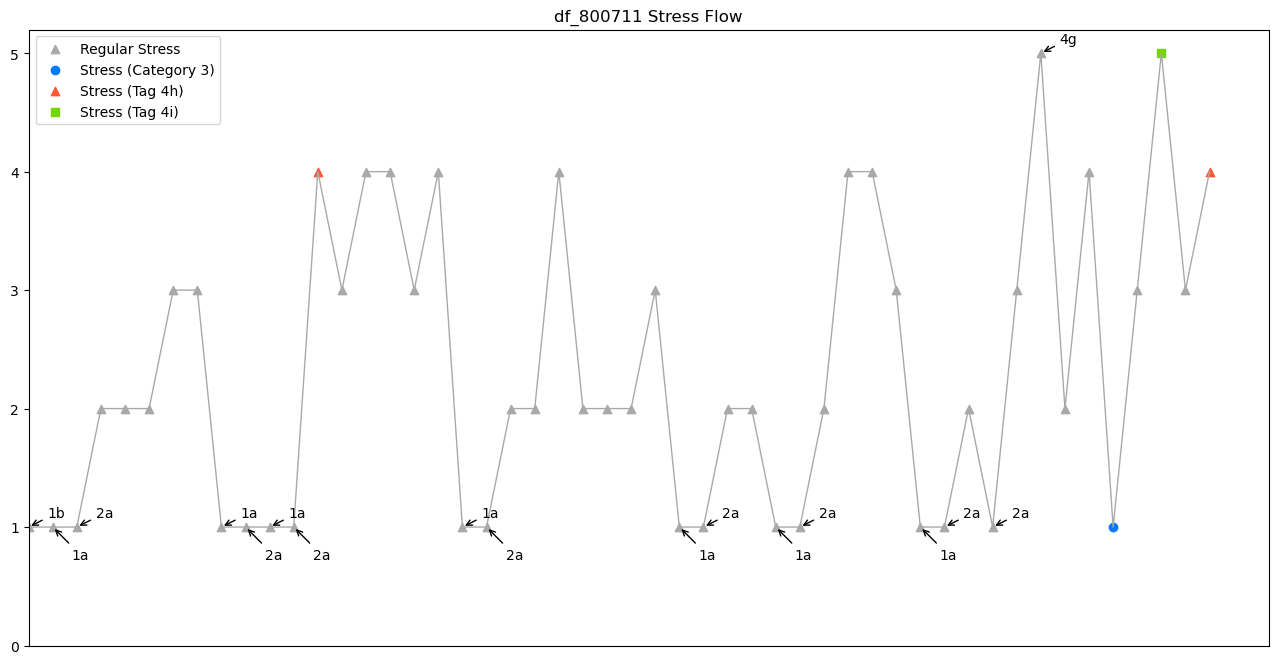

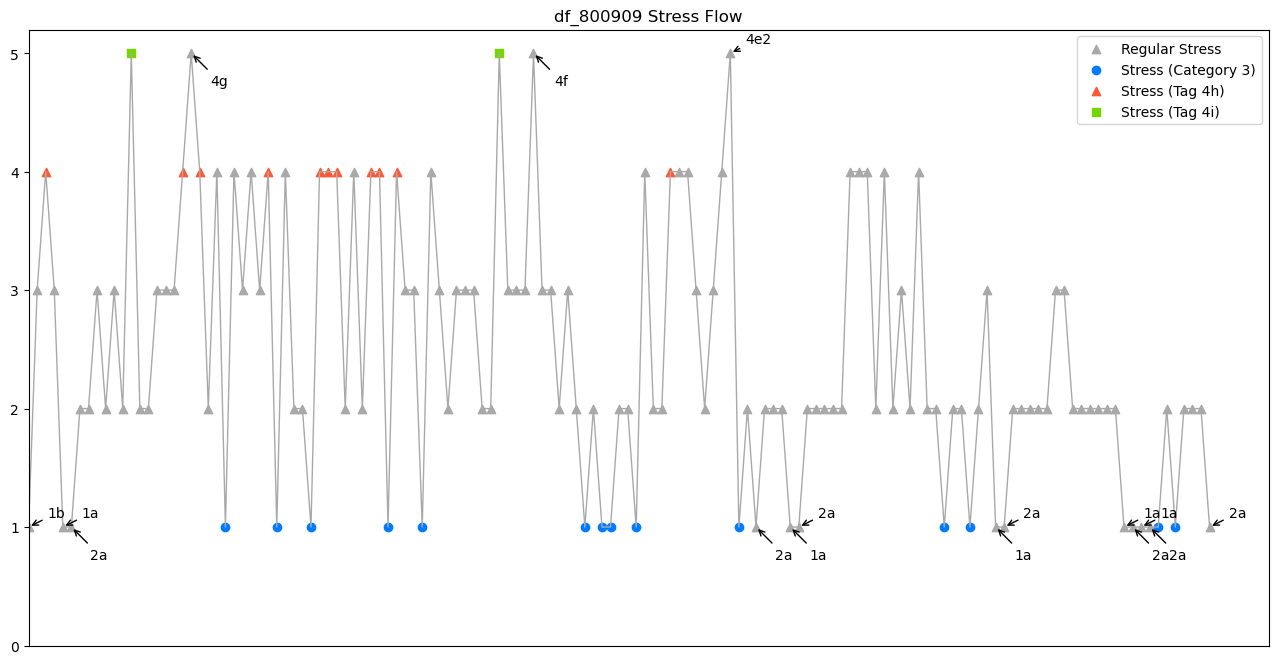

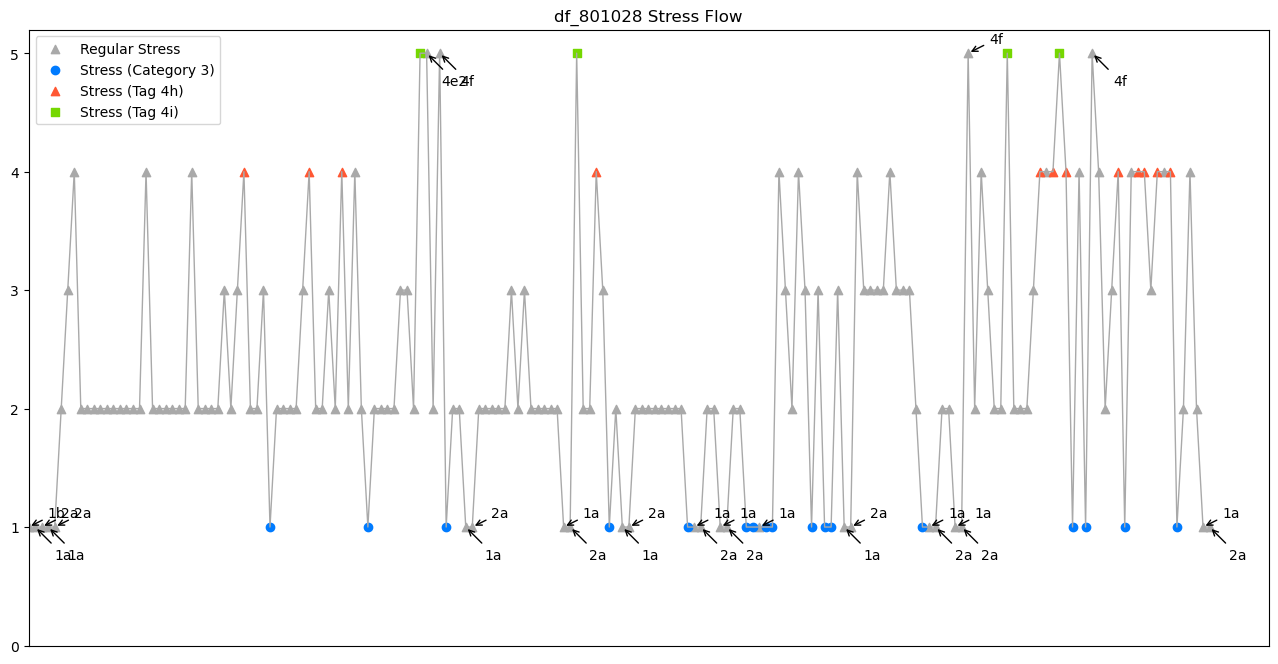

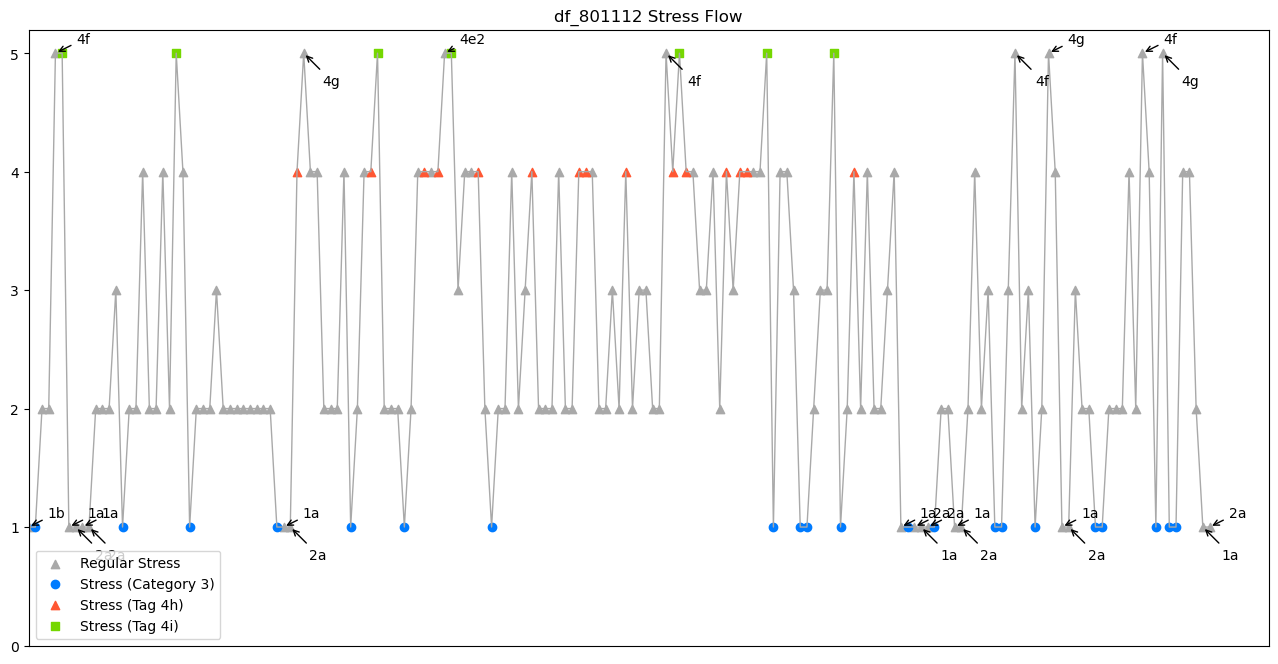

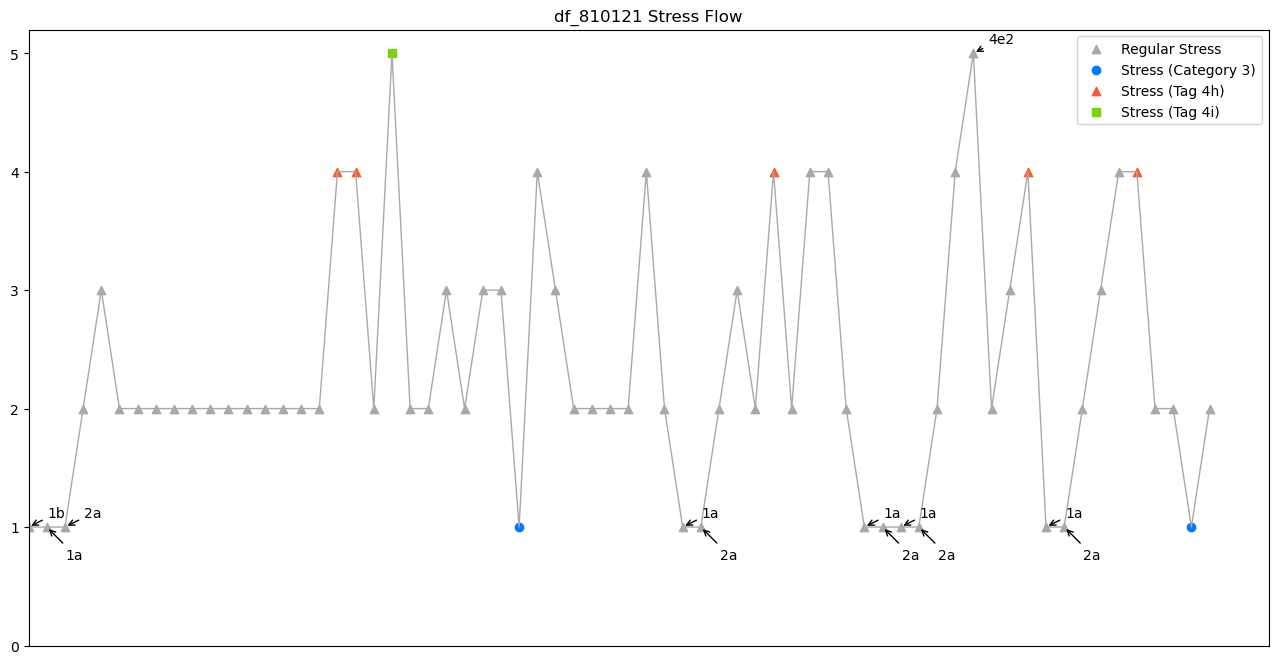

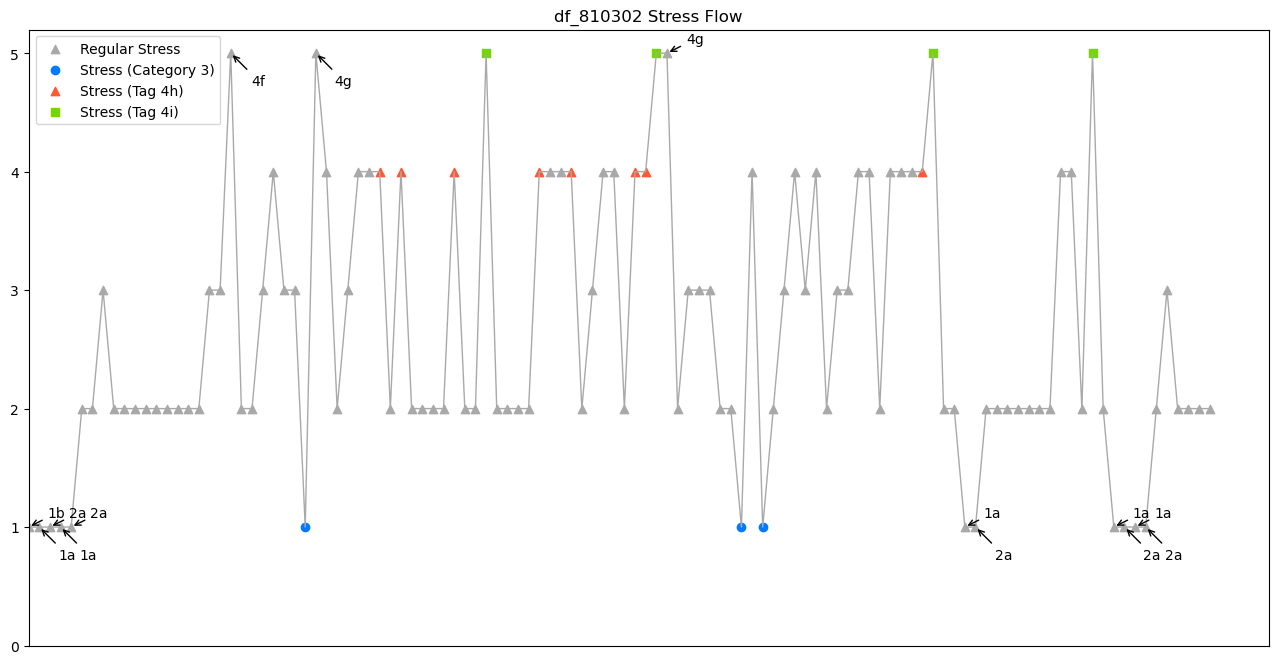

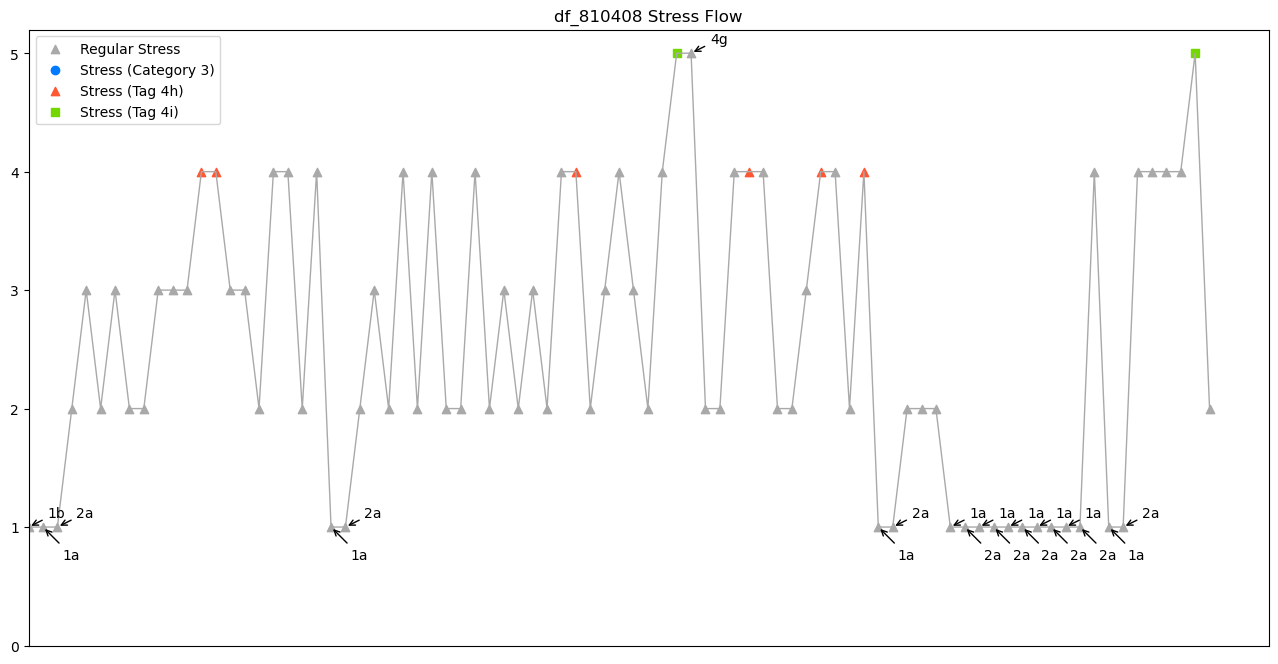

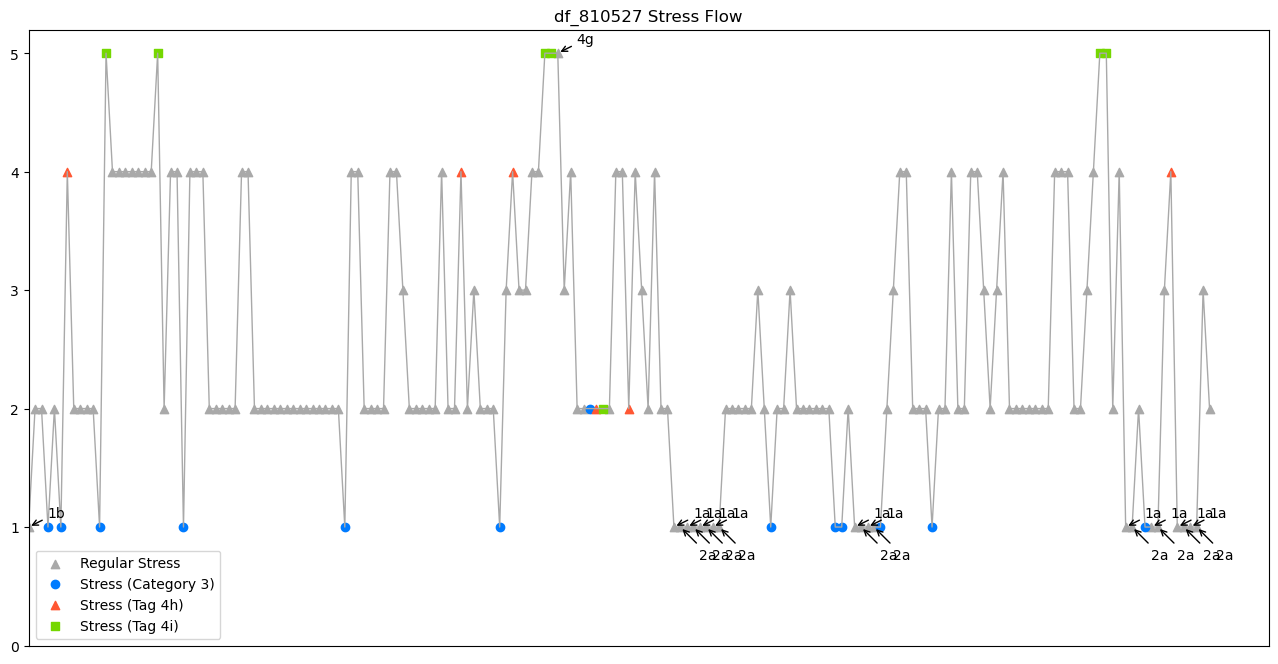

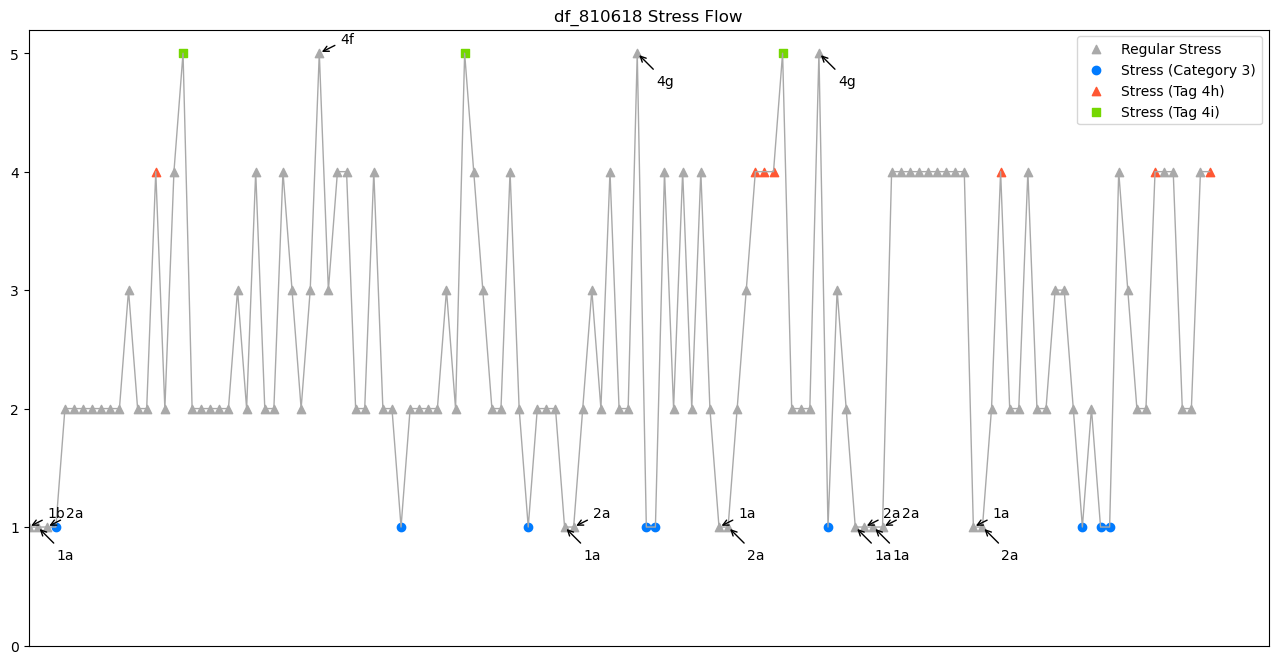

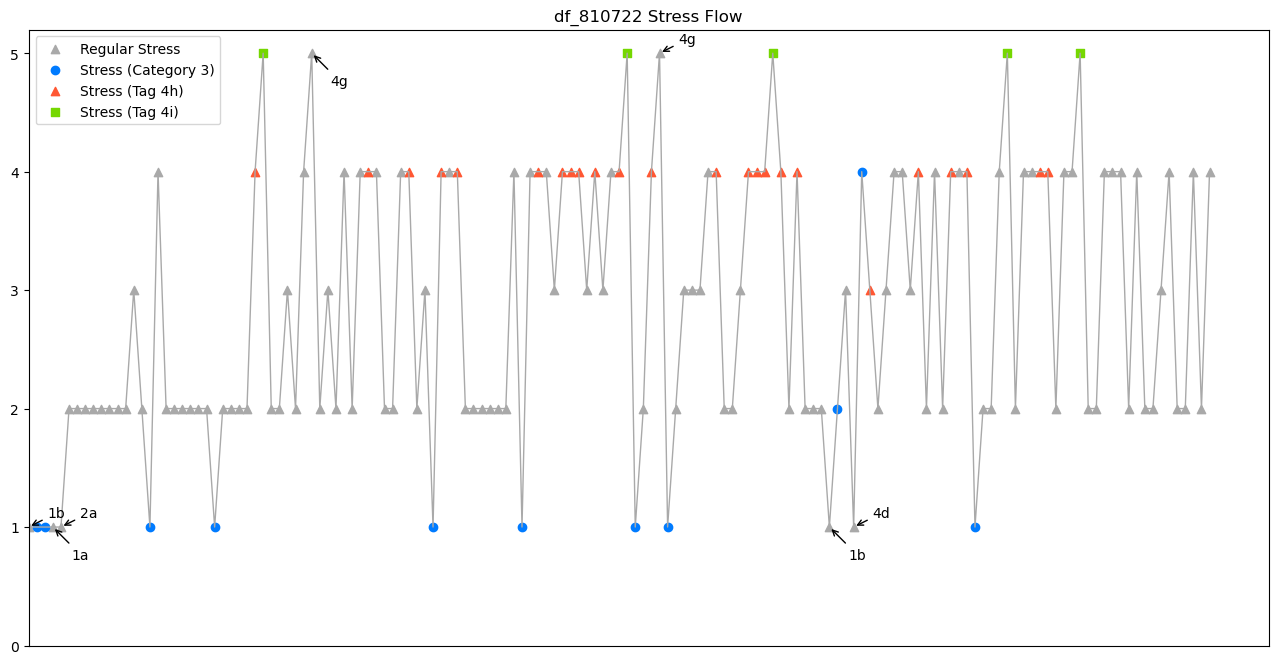

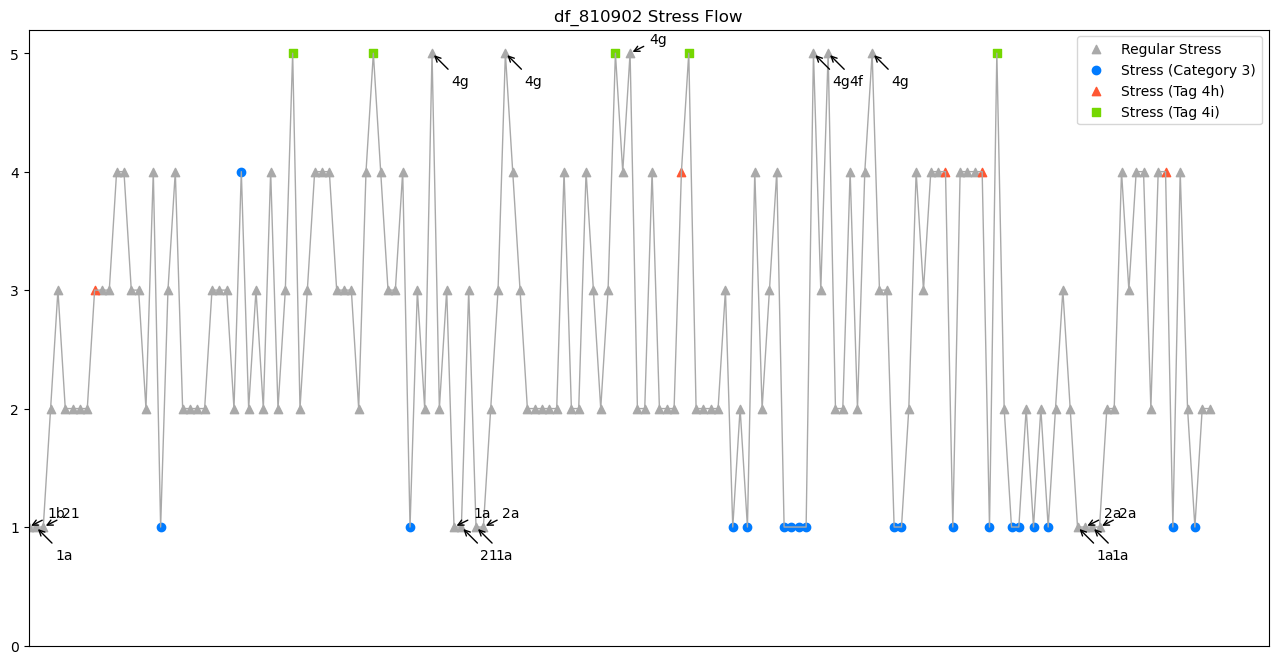

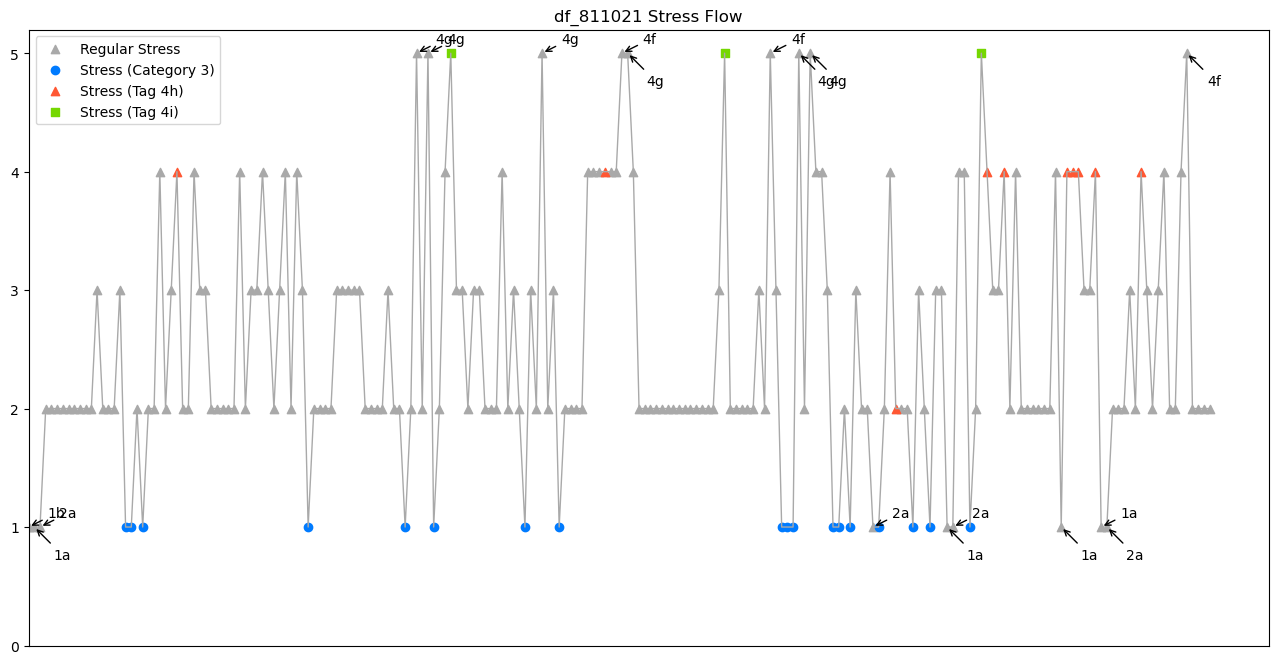

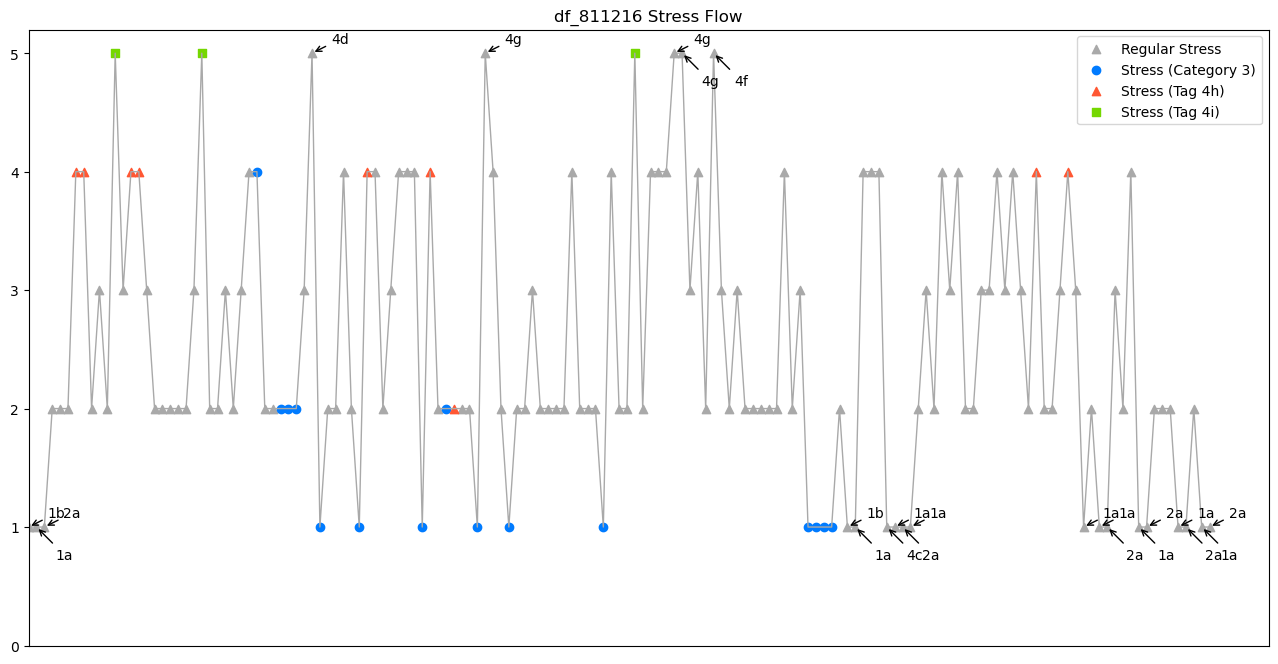

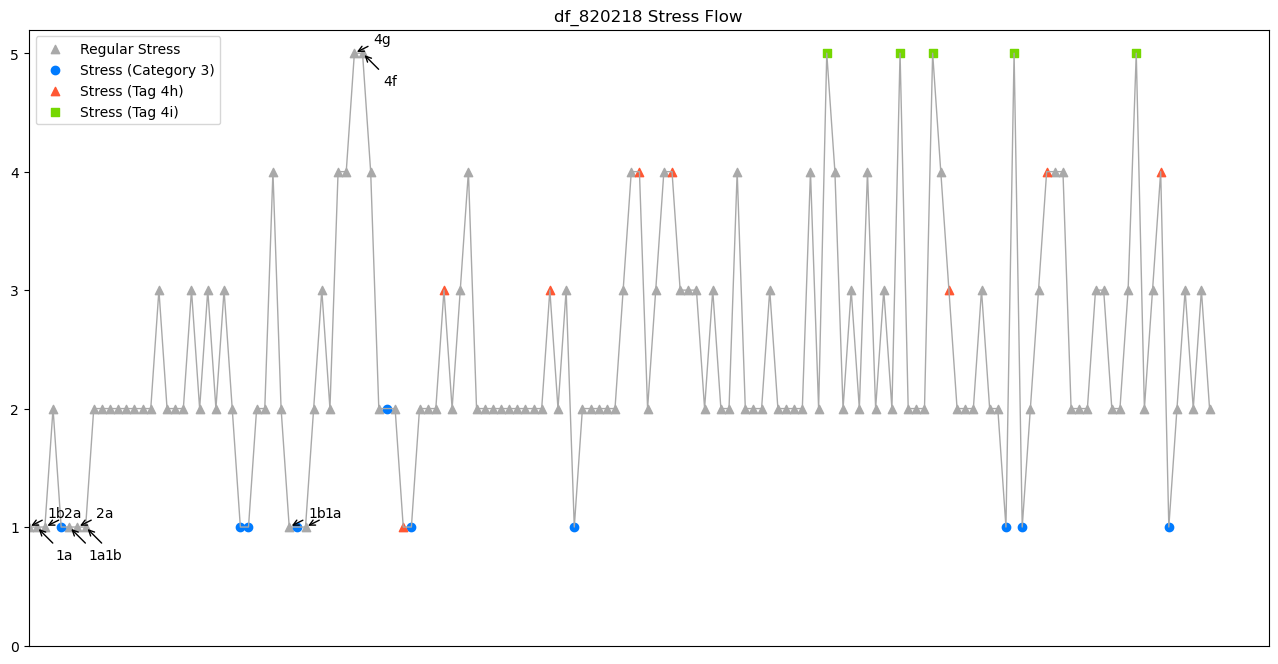

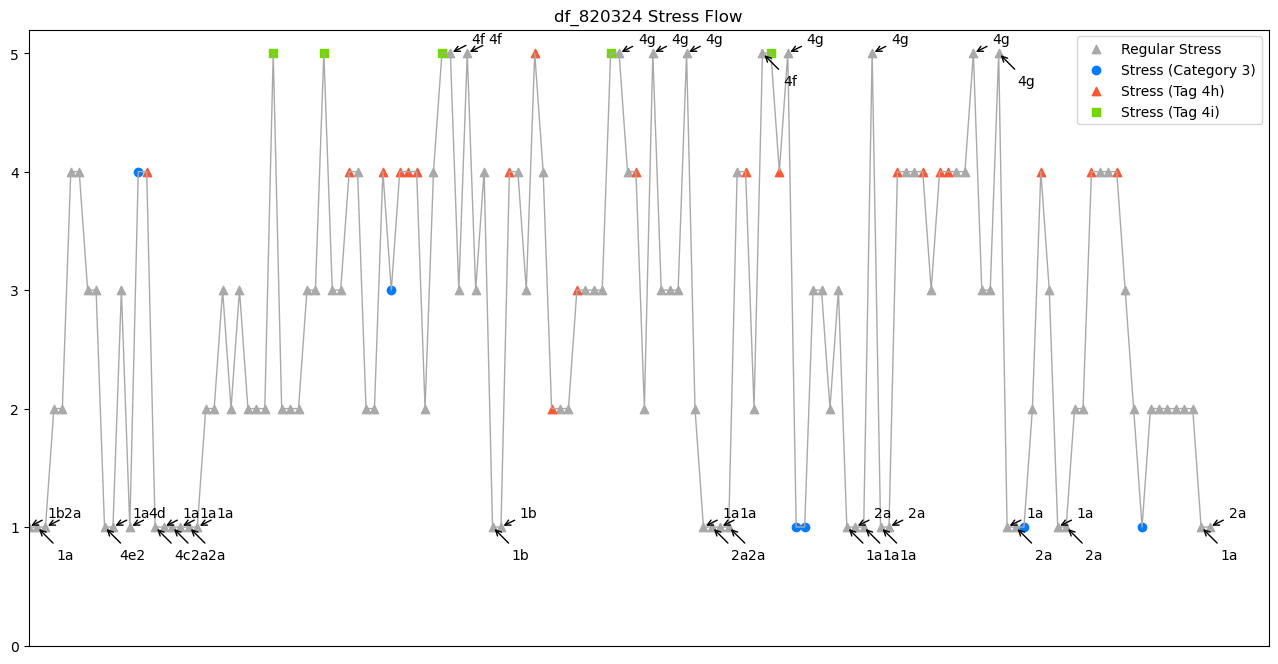

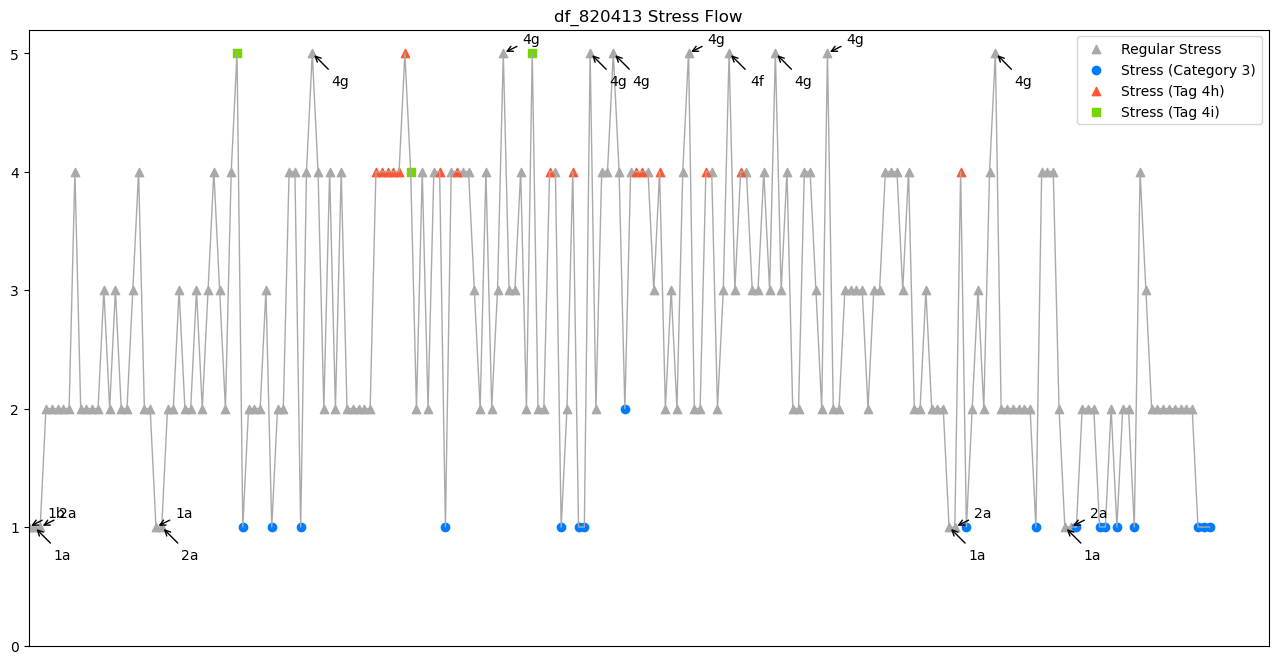

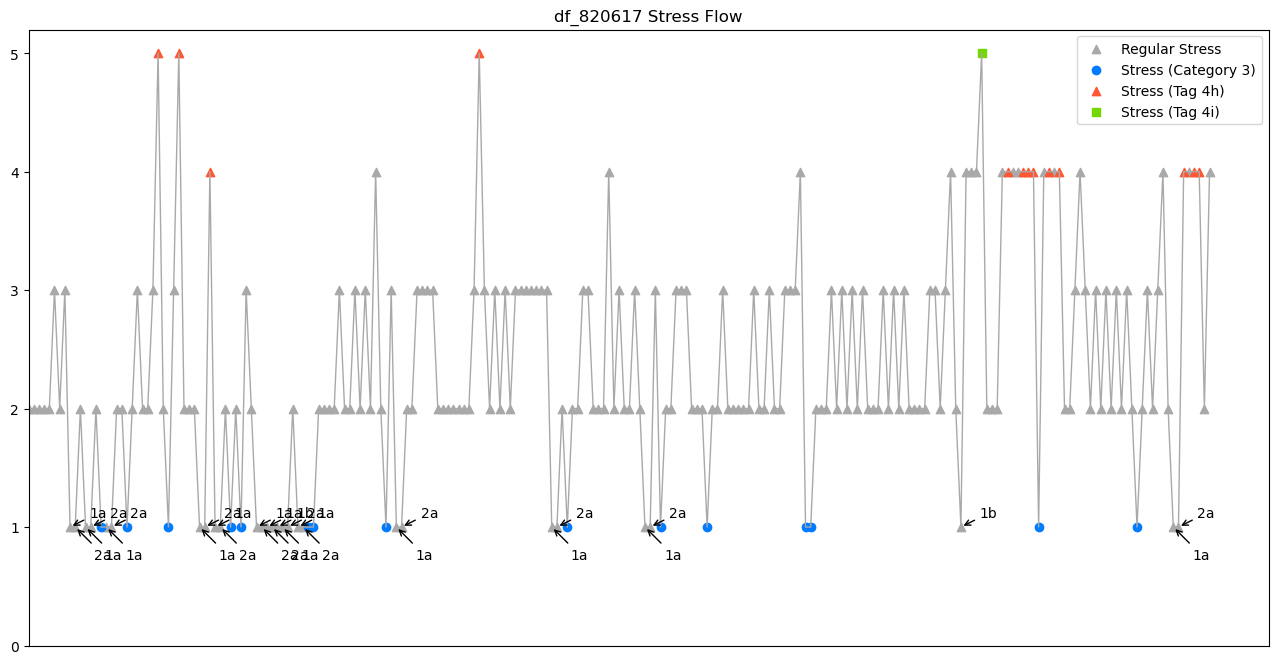

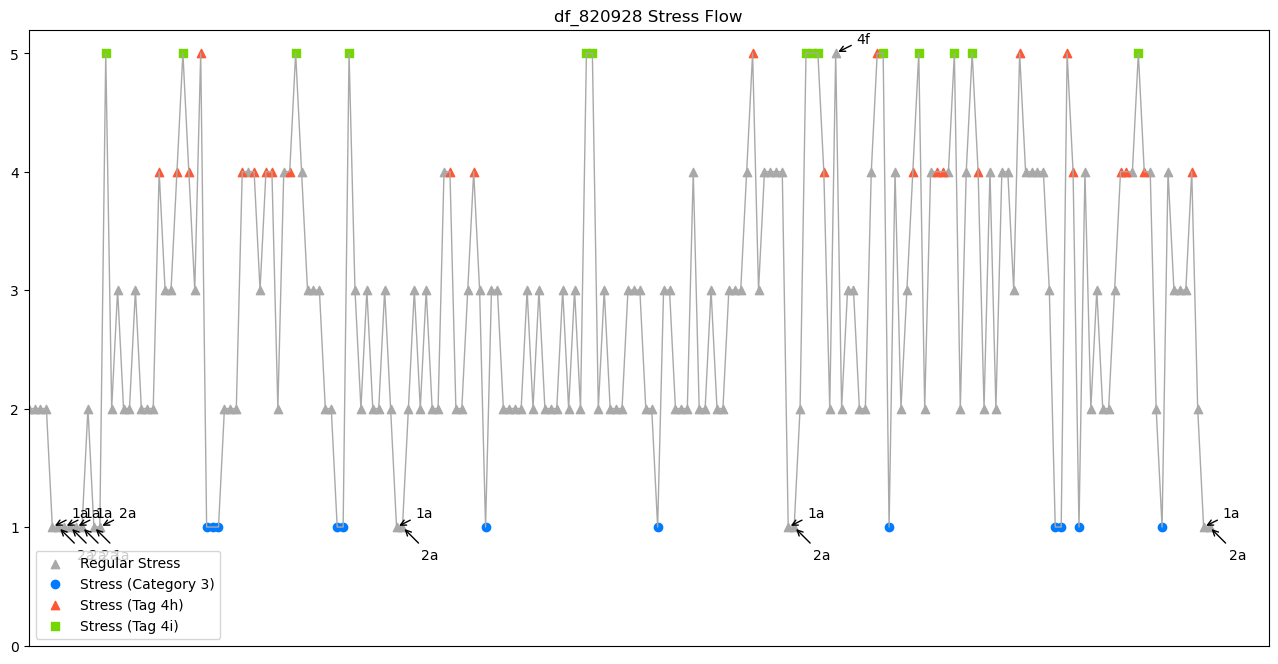

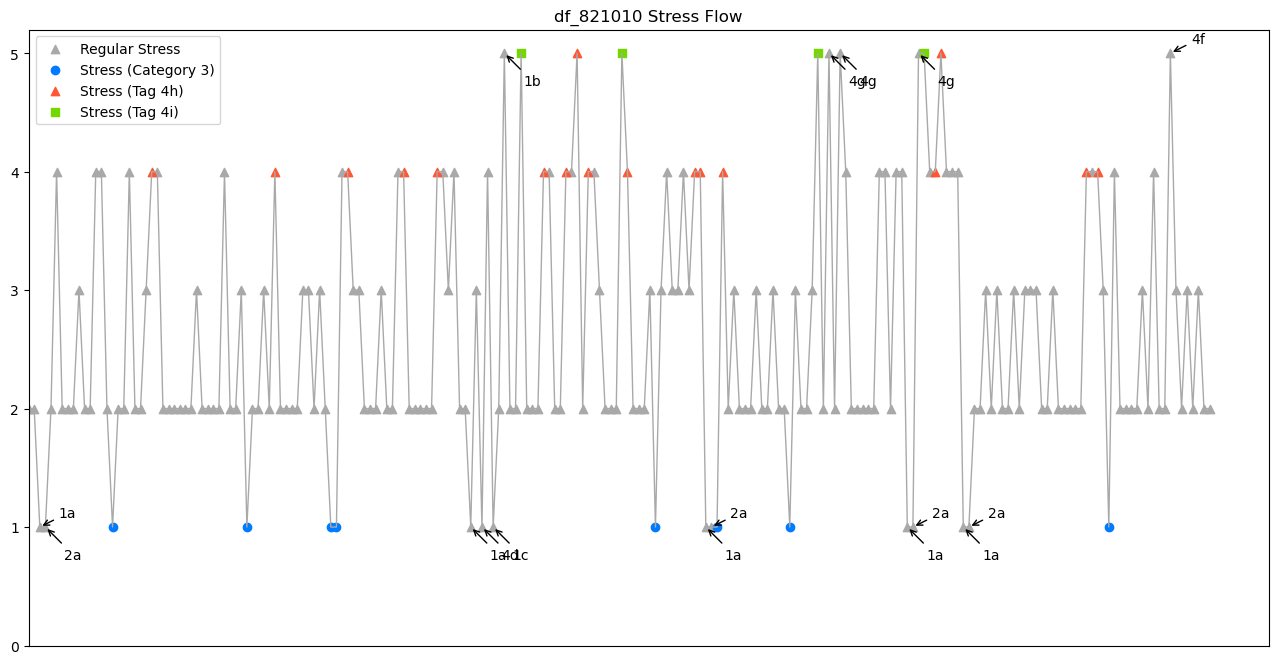

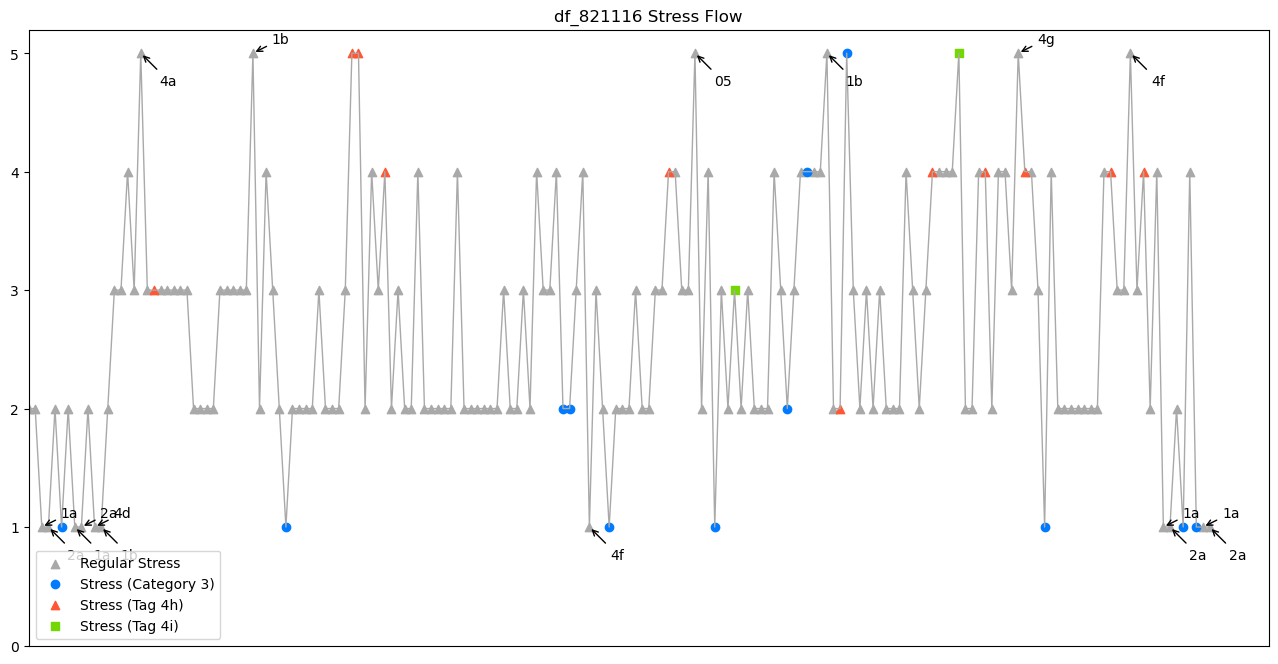

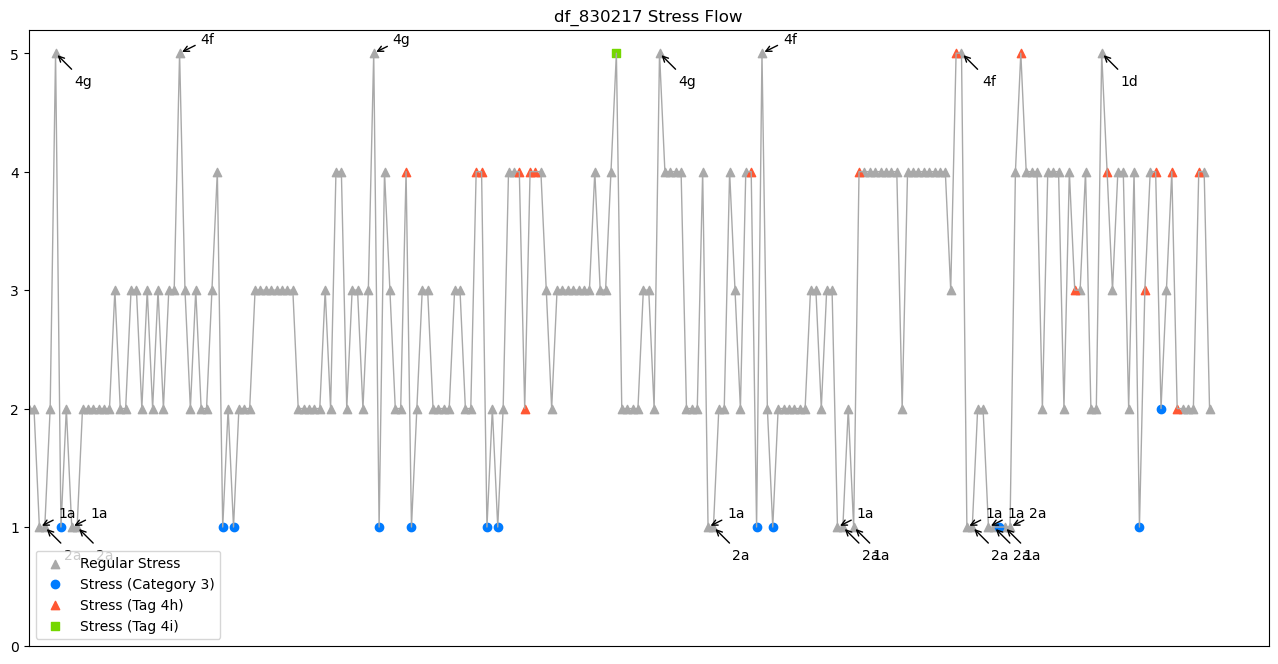

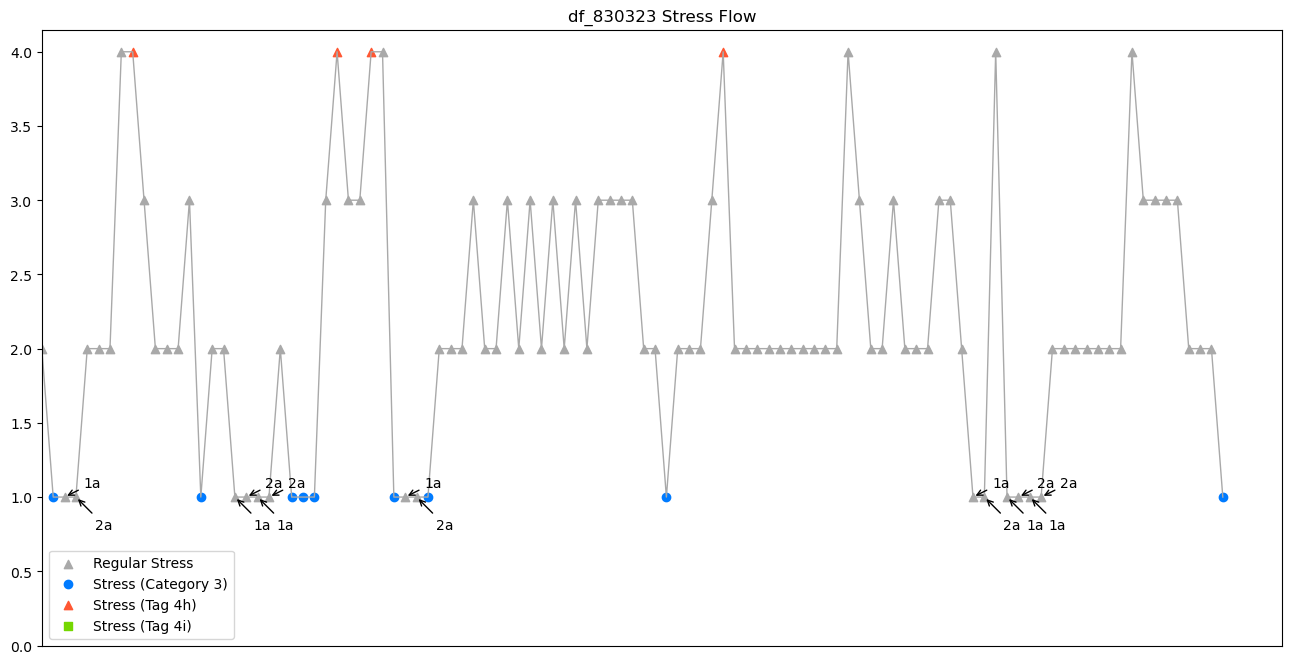

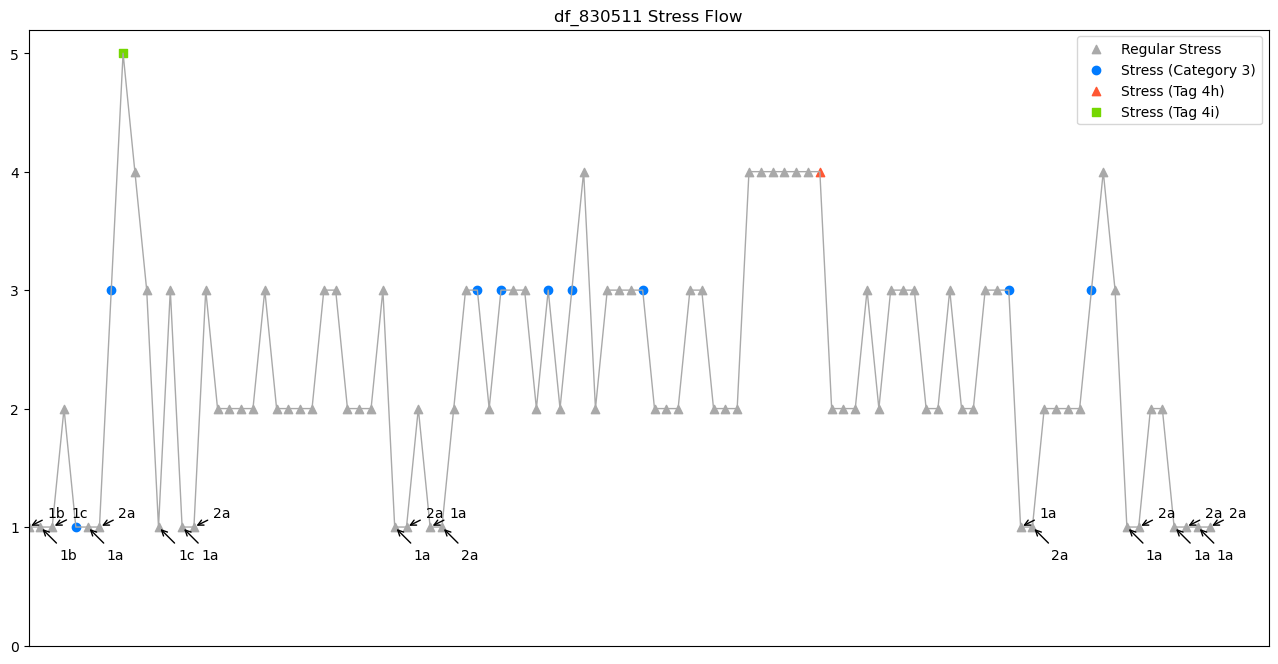

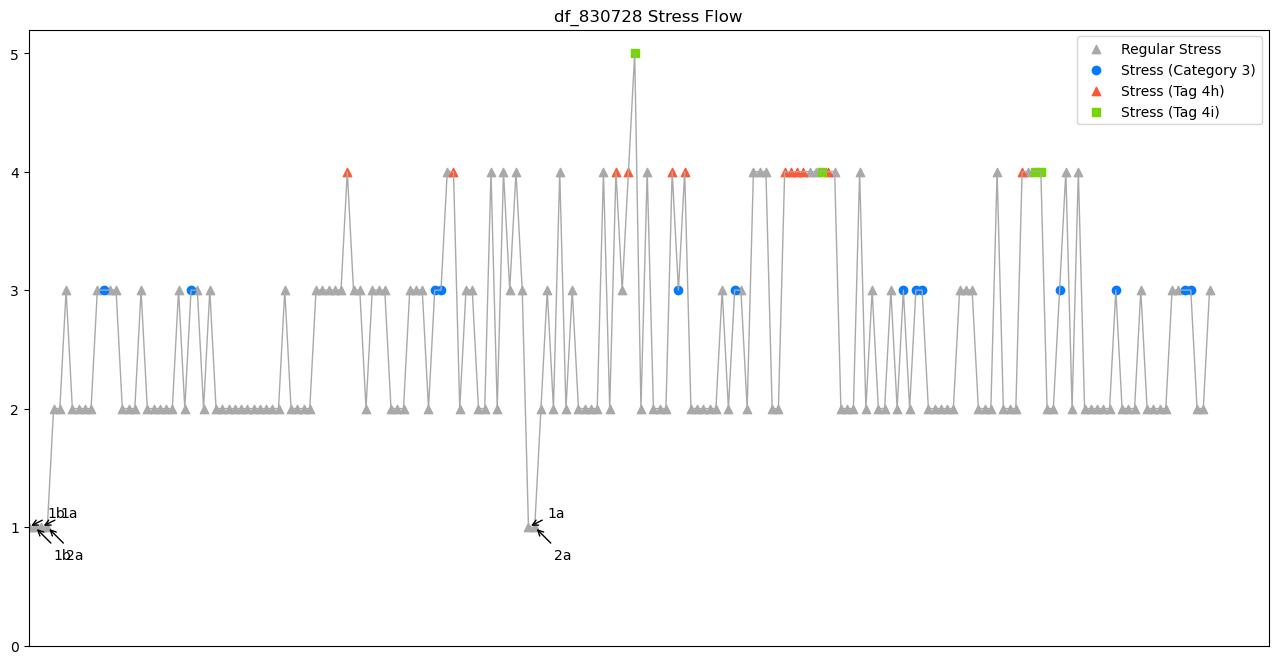

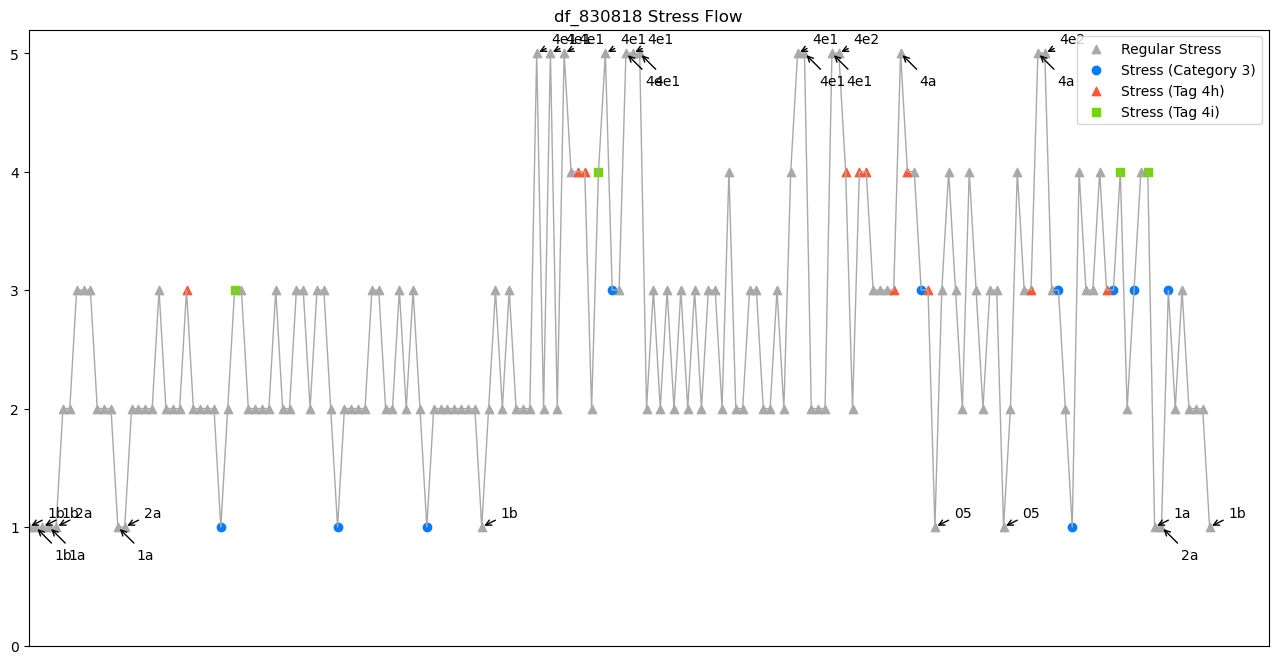

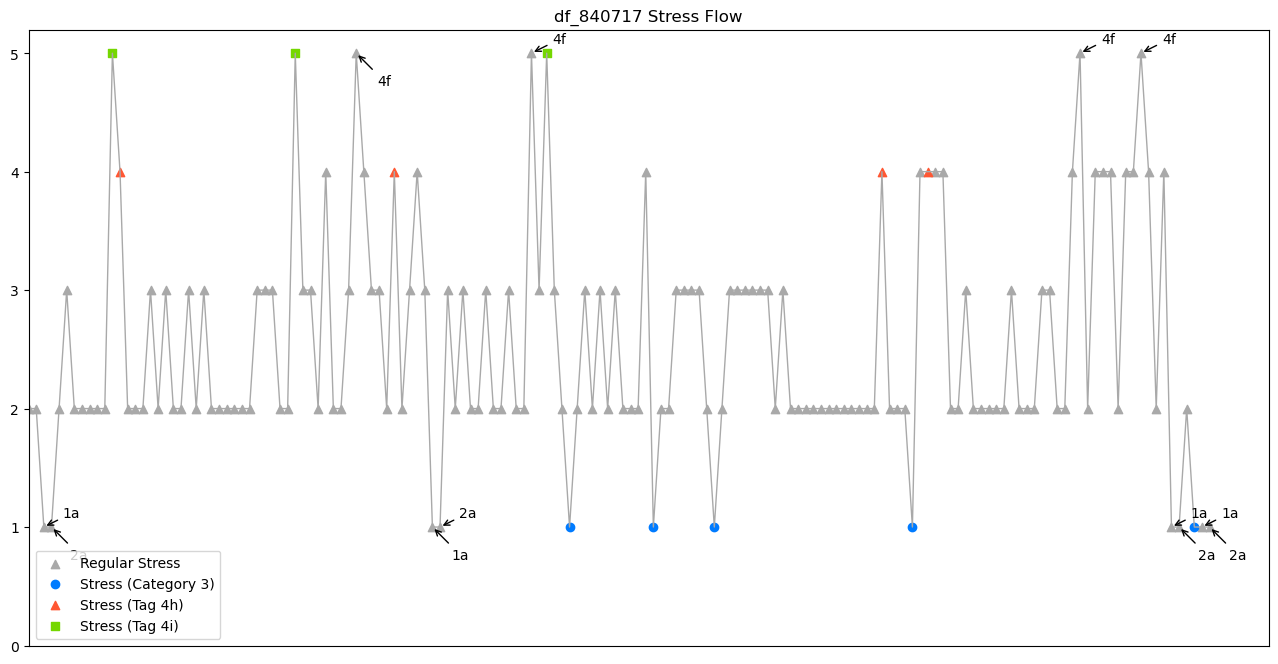

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Function to extract the third component from the 'Tag' column
def extract_third_component(tag_str):
    components = tag_str.strip('[]').split(',')
    if len(components) >= 3:
        return components[2].strip(' \'\"')  # Stripping extra whitespace and quotes
    return None

# Full path including the file name for the PDF
pdf_path = '/Users/ningyuhan/Desktop/31_Stress_plots.pdf'

with PdfPages(pdf_path) as pdf:
    for df_name in dfs_sorted:
        df = globals()[df_name]  # Access the dataframe by name
        df['third_component'] = df['Tag'].apply(extract_third_component)

        # Indices for different categories
        category_3_index = df[df['third_component'].str.startswith('3')].index
        category_4h_index = df[df['third_component'] == '4h'].index
        category_4i_index = df[df['third_component'] == '4i'].index
        regular_index = df[(~df['third_component'].str.startswith('3')) & (df['third_component'] != '4h') & (df['third_component'] != '4i')].index

        plt.figure(figsize=(16, 8))
        ax = plt.gca()  # Get current axes
        x_values = df.index + 1

        # Plot for regular data points, using a subtle color
        plt.scatter(x_values[regular_index], df.loc[regular_index, 'stress_claude2'], color='#A9A9A9', marker='^', label='Regular Stress')
        
        # Plot for category 3, using a vibrant color
        plt.scatter(x_values[category_3_index], df.loc[category_3_index, 'stress_claude2'], color='#007bff', marker='o', label='Stress (Category 3)')
        
        # Plot for category 4h, using a distinct and bright color
        plt.scatter(x_values[category_4h_index], df.loc[category_4h_index, 'stress_claude2'], color='#ff5733', marker='^', label='Stress (Tag 4h)')

        # Plot for category 4i, using another contrasting color
        plt.scatter(x_values[category_4i_index], df.loc[category_4i_index, 'stress_claude2'], color='#75d701', marker='s', label='Stress (Tag 4i)')

        # Line plot connecting all points, using a neutral color
        plt.plot(x_values, df['stress_claude2'], color='#A9A9A9', linestyle='-', linewidth=1)

        # Annotating the level 1 and level 5 gray triangle points with their third component of the tag
        for idx in regular_index:
            stress_level = df.loc[idx, 'stress_claude2']
            if stress_level == 1 or stress_level == 5:
                third_component = extract_third_component(df.loc[idx, 'Tag'])
                x = x_values[idx]
                y = df.loc[idx, 'stress_claude2']
                # Alternate the position of the annotation to reduce overlap
                xytext_offset = (20, 10) if idx % 2 == 0 else (20, -20)
                plt.annotate(third_component,
                             xy=(x, y), xycoords='data',
                             xytext=xytext_offset, textcoords='offset points',
                             arrowprops=dict(arrowstyle="->",
                                             connectionstyle="arc3"),
                             ha='center', va='center')

        plt.xlim(left=1)
        plt.ylim(bottom=0)
        plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        plt.title(f'{df_name} Stress Flow')
        plt.legend()

        pdf.savefig()  
        plt.show()  

